# Generating synthetic data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
def feature_scaling(X_train, *X_others):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    scaled = [X_train_scaled]
    for X in X_others:
        scaled.append(scaler.transform(X))
    return scaled

In [2]:
data = pd.read_csv("./data/rBergomi/labled_data_all_0.csv")

In [3]:
data.head()

,Moneyness,Time to Maturity (years),H,eta,rho,v0,iv
0,0.820165,0.219184,0.081945,2.255543,-0.684322,0.241298,0.523130
1,0.926490,0.212487,0.024855,2.523325,-0.639780,0.368089,0.538562
2,0.834318,0.190719,0.080699,2.844218,-0.865874,0.495959,0.648789
3,1.053977,0.226441,0.145114,2.459598,-0.662612,0.303747,0.406144
4,0.802749,0.208923,0.106086,2.420046,-0.504125,0.201463,0.493122


In [4]:
data1 = pd.read_csv("./data/rBergomi/labled_data_all_1.csv")
data1.head()

,Moneyness,Time to Maturity (years),H,eta,rho,v0,iv
0,0.833889,0.167013,0.020072,2.964742,-0.795204,0.404048,0.577495
1,0.962248,0.180247,0.047618,2.818493,-0.753436,0.314545,0.459118
2,0.903272,0.228407,0.076439,2.684975,-0.902011,0.230565,0.442509
3,0.794328,0.219123,0.107098,2.667112,-0.926303,0.283869,0.565221
4,0.934002,0.246055,0.051442,2.094987,-0.997330,0.298036,0.494854


In [13]:
import scipy

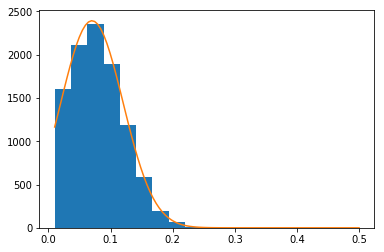

In [23]:
plt.hist(data1['H'])
x_bin = np.linspace(0.01, 0.5, 100)
y_bin = scipy.stats.norm.pdf(x_bin, loc=0.07, scale=0.05) * 300
plt.plot(x_bin,y_bin)

# Neural Network

A neural network returns both the predicted IV value, and corresponding Jacobian matrix

# Deep Calibration

In [8]:
def deep_calibration(nn, jacobian, weights, market_quotes, market_info, model_name, lambd_init, max_iter, tol, beta0, beta1):
    # initialize
    mu = param_initializer(model_name)
    lambd = lambd_init
    param_names = mu.keys()
    mu = mu.values()
    m = len(mu)
    W = np.diag(weights)
    I = np.eye(m)
    n = 0
    # predict
    R = nn.predict(...) - Q # TODO
    J = None # TODO
    J_W = J.T.dot(W)
    delta_mu = np.linalg.pinv(J_W.dot(J) + lambd * I).dot(J_W.dot(R)) # vector size: [m, ]
    while n < max_iter and np.linalg.norm(delta_mu) > tol:
        mu_new = mu + delta_mu
        R_new = nn.predict(...) - Q # TODO
        R_norm = np.linalg.norm(R)
        c_mu = (R_norm - np.linalg.norm(R_new)) / (R_norm - np.linalg.norm(R + J.dot(delta_mu)))
        if c_mu <= beta0:
            # reject delta_mu
            lambd *= 2 # too slow, use greater lambd
        else:
            # accept delta_mu
            mu += delta_mu
            R = R_new
            J = None # TODO
            J_W = J.T.dot(W)
        if c_mu >= beta1:
            lambd /= 2 # too quick, use smaller lambd
        delta_mu = np.linalg.pinv(J_W.dot(J) + lambd * I).dot(J_W.dot(R)) # vector size: [m, ]
        n += 1
    return dict(zip(param_names, mu))